# ML PROJECT 2 - VEHICLE PRICE PREDICTION 

####  our algorithm will take vehicle details like mileage,engin type, no of doors, lenght,width,height,engine capacity,etc.... and our algorithm will predict  PRICE of the vehicle

# step 1 - load the data 

In [1]:
import pandas as pd

auto_data = pd.read_csv('auto.txt')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# step 2 - clean data

In [2]:
# you can observe there are some columns with values ? lets clean these.
import numpy as np
auto_data = auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto_data['price'].describe() # let see what is the data type of price column

count      201
unique     186
top       8921
freq         2
Name: price, dtype: object

In [4]:
# we have to convert this column to float type
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') #coerce means force ignore err
auto_data['price'].describe() #now type is converted to float

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [5]:
# let us remove unwanted columns --  which are not useful

In [6]:
auto_data = auto_data.drop('normalized-losses', axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
auto_data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [8]:
auto_data['horsepower'].describe() 

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

In [9]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')#cnvrt to float
auto_data['horsepower'].describe() 

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [10]:
auto_data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [11]:
auto_data['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [12]:
auto_data['bore'] = pd.to_numeric(auto_data['bore'], errors='coerce')#cnvrt to float
auto_data['bore'].describe() 

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [13]:
auto_data['stroke'] = pd.to_numeric(auto_data['stroke'], errors='coerce')#cnvrt to float
auto_data['stroke'].describe() 

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [14]:
auto_data['peak-rpm'] = pd.to_numeric(auto_data['peak-rpm'], errors='coerce')#cnvrt to float
auto_data['peak-rpm'].describe() 

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

In [15]:
auto_data['num-of-cylinders'] 

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [16]:
cylinders_dict = {
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}
auto_data['num-of-cylinders'].replace(cylinders_dict, inplace = True)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [17]:
auto_data['num-of-cylinders'].head()

0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64

In [18]:
a = {'1bbl':1, '2bbl':2, '4bbl':4, 'idi':5, 'mfi':6, 'mpfi':7,
               'spdi':8, 'spfi':9}
auto_data['fuel-system'].replace(a, inplace = True)

b = {'dohc':1, 'dohcv':2, 'l':3, 'ohc':4, 'ohcf':5, 'ohcv':6,
              'rotor':7}
auto_data['engine-type'].replace(b, inplace = True)

c = {'front':1, 'rear':2}
auto_data['engine-location'].replace(c, inplace = True)

d = {'4wd':1, 'fwd':2, 'rwd':3}
auto_data['drive-wheels'].replace(d, inplace = True)

e = {
    'alfa-romero' : 1,'audi' : 2,'bmw': 3,'chevrolet' :4,'dodge':5,
        'honda':6, 'isuzu':7,'jaguar':8, 'mazda':9, 'mercedes-benz':10, 
        'mercury':11,'mitsubishi':12, 'nissan':13, 'peugot':14, 
        'plymouth':15,'porsche':16, 'renault':17, 'saab':18, 'subaru':19,
       'toyota':20, 'volkswagen':21, 'volvo':22
}
auto_data['make'].replace(e, inplace = True)

f = {'convertible':1,'hardtop':2, 'hatchback':3, 'sedan':4, 'wagon':5}
auto_data['body-style'].replace(f, inplace = True)

g = {'four':4, 'two':2}
auto_data['num-of-doors'].replace(g, inplace = True)

h = {'std':0, 'turbo':1}
auto_data['aspiration'].replace(h, inplace = True)



auto_data.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,gas,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,gas,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,gas,0,2.0,3,3,1,94.5,171.2,...,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,gas,0,4.0,4,2,1,99.8,176.6,...,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,gas,0,4.0,4,1,1,99.4,176.6,...,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,2,gas,0,2.0,4,2,1,99.8,177.3,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,2,gas,0,4.0,4,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,2,gas,0,4.0,5,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,2,gas,1,4.0,4,2,1,105.8,192.7,...,131,7,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,2,gas,1,2.0,3,1,1,99.5,178.2,...,131,7,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [19]:
i = {'gas':0, 'diesel':1}
auto_data['fuel-type'].replace(i,inplace = True)

auto_data.head(10)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,0,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,0,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,0,0,2.0,3,3,1,94.5,171.2,...,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,0,0,4.0,4,2,1,99.8,176.6,...,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,0,0,4.0,4,1,1,99.4,176.6,...,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,2,0,0,2.0,4,2,1,99.8,177.3,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,2,0,0,4.0,4,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,2,0,0,4.0,5,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,2,0,1,4.0,4,2,1,105.8,192.7,...,131,7,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,2,0,1,2.0,3,1,1,99.5,178.2,...,131,7,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [20]:
auto_data.isnull()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
auto_data.isna().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [22]:
# horsepower
# curb-weight
# peak-rpm
del auto_data['horsepower']
del auto_data['curb-weight']
del auto_data['peak-rpm']


In [23]:
# lets clean up our data
auto_data = auto_data.dropna()

# step 3 -train test split

In [24]:
from sklearn.model_selection import train_test_split
# lets feed our data to machine learning model
x = auto_data.drop('price', axis=1)

y = auto_data['price']

# split data into 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

# step 4 - train the algorithm

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [26]:
linear_model.score(x_train, y_train) # traing data accuracy

0.8977925747050544

In [27]:
linear_model.coef_

array([  -667.83607138,   -201.03840036, -11877.75594957,   3267.45664655,
         -341.88511643,   -275.67970494,    534.24818935,  12457.43964247,
          -27.57274928,     13.49191389,    735.2578018 ,    331.25941981,
         -633.39734035,    167.85881525,    149.24314962,    266.08507362,
        -3020.67818985,  -4381.08882035,    866.25626477,   -280.79536587,
          314.52728571])

In [28]:
predictors = x_train.columns #see the weights associcated with perticuler feature
coef = pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)

fuel-type           -11877.755950
stroke               -4381.088820
bore                 -3020.678190
symboling             -667.836071
engine-type           -633.397340
num-of-doors          -341.885116
city-mpg              -280.795366
body-style            -275.679705
make                  -201.038400
wheel-base             -27.572749
length                  13.491914
engine-size            149.243150
num-of-cylinders       167.858815
fuel-system            266.085074
highway-mpg            314.527286
height                 331.259420
drive-wheels           534.248189
width                  735.257802
compression-ratio      866.256265
aspiration            3267.456647
engine-location      12457.439642
dtype: float64


# step 5 - test the algorithm

In [29]:
# lets predict using linear regression model
y_predict = linear_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


C:\Users\91918\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


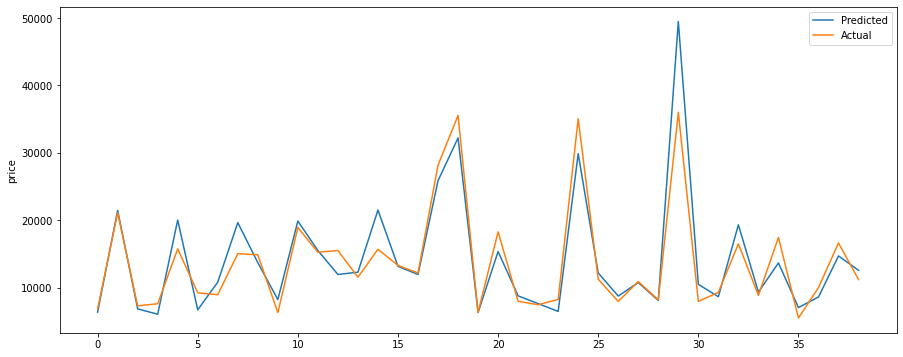

In [30]:
# lets plot the prediction using matplot lib
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('price')
plt.legend()
plt.show()

In [31]:
# how well our regression model works on our test data
score = linear_model.score(x_test, y_test)
score

0.8409940243694667

# step 6 - find the error(how much is the error in the output)

### MEAN SQUARED ERROR --- ###  this will tell us how much error is there in the given output.

In [32]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(y_predict, y_test) #predicted y and actual y..
linear_model_mse # its coming out to be 26 millions

9848274.421919573

In [33]:
import math
math.sqrt(linear_model_mse)

3138.1960458071408

## conclusion for linear regression algorithm - accuracy is 84% and error is 3,138 dollars

# step 7 : improvies, let us test other algorithms

In [34]:
# implementing lasso and ridge regression models.
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5, normalize=True) #alpha is regularization parametter 
lasso_model.fit(x_train, y_train)

C:\Users\91918\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.5, normalize=True)

In [35]:
coef = pd.Series(lasso_model.coef_, predictors).sort_values()
print(coef)

fuel-type            -7268.421633
stroke               -4024.350234
bore                 -2191.378272
engine-type           -648.687296
symboling             -603.255536
body-style            -294.850287
num-of-doors          -271.787484
city-mpg              -216.952356
make                  -196.387898
wheel-base             -20.796517
length                  11.544332
engine-size            135.243830
highway-mpg            260.129778
fuel-system            261.962291
height                 319.023898
compression-ratio      525.214813
num-of-cylinders       579.079765
drive-wheels           614.931666
width                  743.132522
aspiration            2861.847142
engine-location      12747.200906
dtype: float64


In [36]:
y_predict = lasso_model.predict(x_test)
score = lasso_model.score(x_test,y_test)
print('accuracy of lassoo model is  ....',score)
lasso_model_mse = mean_squared_error(y_predict,y_test)
print('error of lasso model is...', math.sqrt(lasso_model_mse))

accuracy of lassoo model is  .... 0.8549364877465662
error of lasso model is... 2997.4534137729383


## conclusion for lasso - accuracy is 85% and error is 2997 dollars